## Informasi Mahasiswa

Nama: Wilda Fahera

NPM: 2108107010026

## Jenis Dataset

Dataset yang digunakan berasal dari web kaggle https://www.kaggle.com/datasets/shivam2503/diamonds 

Rincian Dataset:
- Berisi nilai harga dalam bentuk integer.
- carat: Berisi nilai berat berlian dalam bentuk float64.
- cut: Merupakan kategori untuk kualitas potongan dengan tipe data object.
- color: Merupakan kategori untuk warna berlian dengan tipe data object.
- clarity: Merupakan kategori untuk tingkat kejelasan berlian dengan tipe data object.
- x: Berisi nilai panjang dalam mm dalam bentuk float64.
- y: Berisi nilai lebar dalam mm dalam bentuk float64.
- z: Berisi nilai kedalaman dalam mm dalam bentuk float64.
- depth: Berisi nilai persentase kedalaman dalam bentuk float64.
- table: Berisi nilai lebar bagian atas berlian relatif terhadap titik terlebar dalam bentuk float64.

## Import Library

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
import tensorflow as tf
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

## Load Data

In [2]:
# Load Data 
df = sns.load_dataset('diamonds')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Preprocessing Data

In [3]:
# Info ()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [4]:
# Preprocessing 
cat_col = ['cut','clarity','color']
le = LabelEncoder()
for col in cat_col:
    df[col] = le.fit_transform(df[col])

melakukan preprocessing pada kolom-kolom kategorikal dalam DataFrame df dengan menggunakan LabelEncoder untuk mengubah nilai-nilai kategorikal menjadi nilai numerik, sehingga memungkinkan penggunaan data kategorikal dalam proses pembelajaran mesin yang memerlukan input numerik.

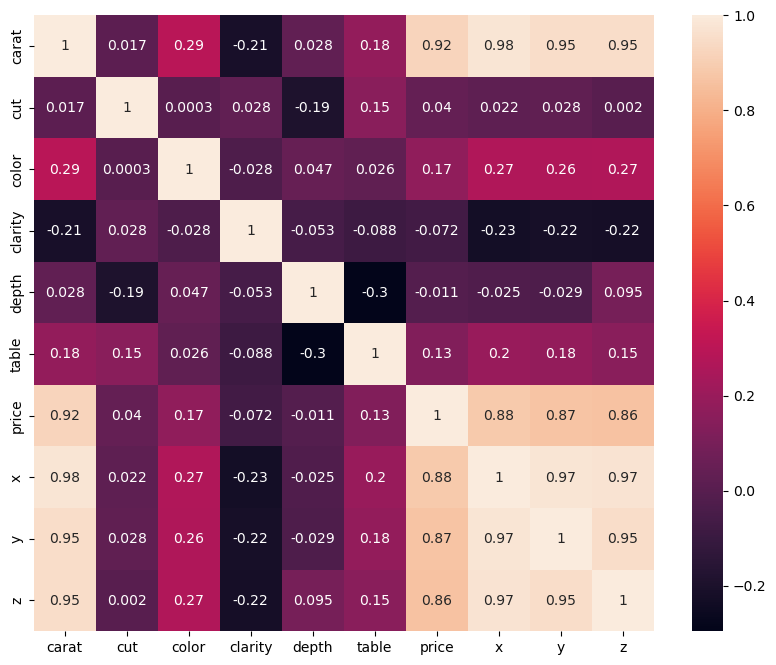

In [5]:
#Correlation
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [6]:
# Outlier Detection Using IQR 
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
IQR = q3 - q1

# Print Outliers
((df < (q1 - 1.5 * IQR)) | (df > (q3 + 1.5 * IQR))).sum()
# Remove 
df = df[~((df < (q1 - 1.5 * IQR)) | (df > (q3 + 1.5 * IQR))).any(axis=1)]
((df < (q1 - 1.5 * IQR)) | (df > (q3 + 1.5 * IQR))).sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

mendeteksi dan menghapus outlier dari DataFrame menggunakan metode Interquartile Range (IQR), yang secara efektif membersihkan data dari nilai-nilai yang ekstrem.

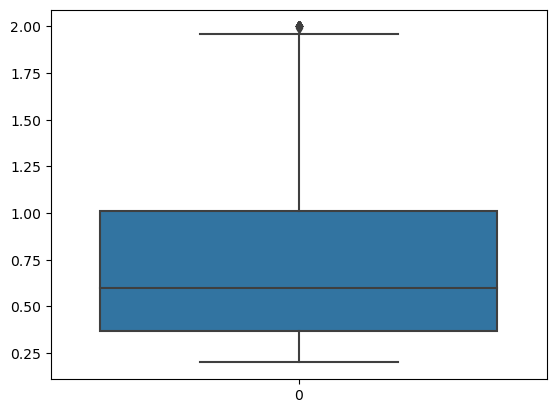

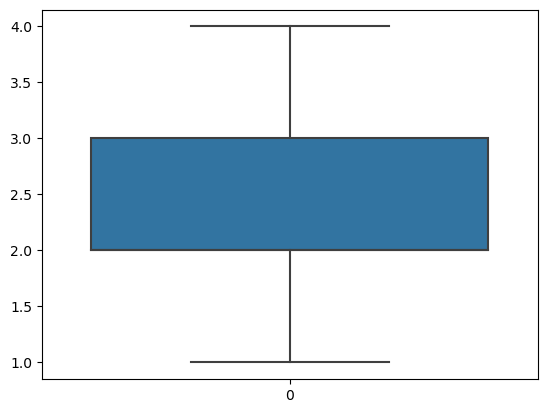

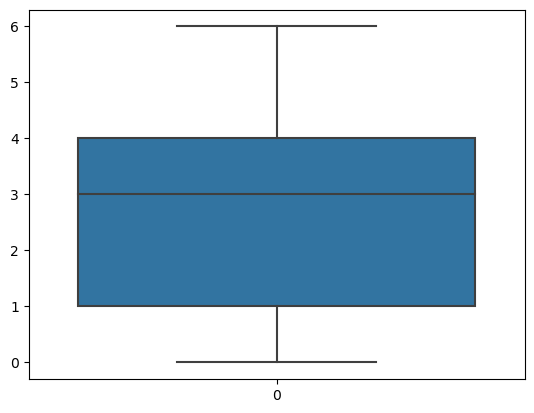

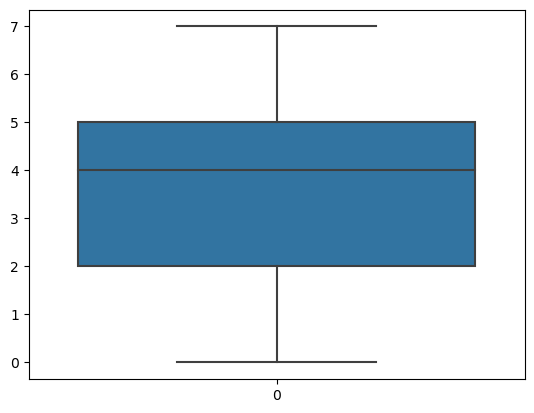

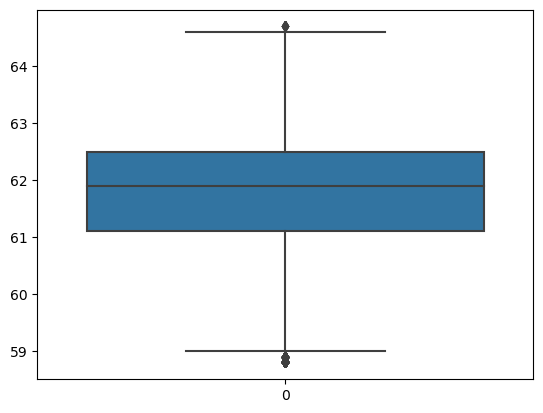

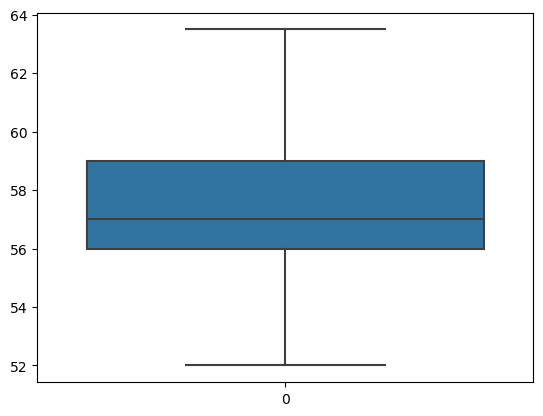

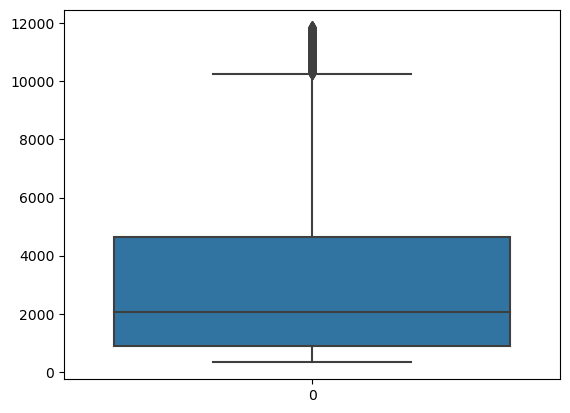

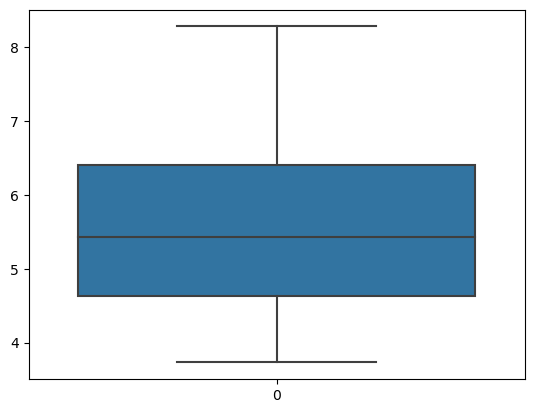

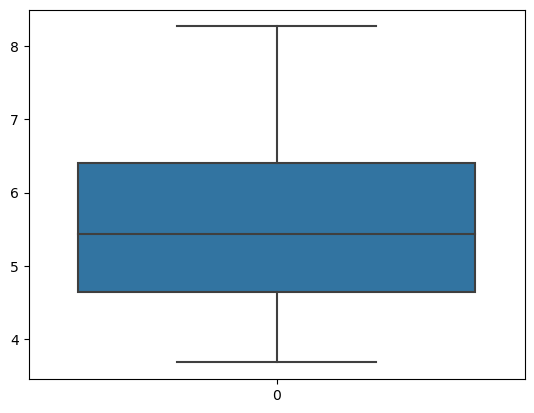

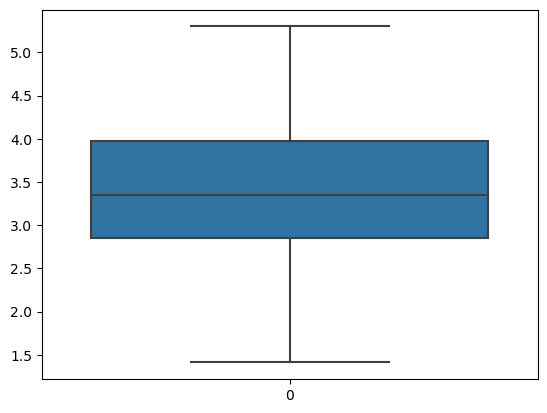

In [7]:
# Plot boxplot of each column
for col in df.columns:
    sns.boxplot(df[col])
    plt.show()

## Split Dataset

In [8]:
# Split Data
X = df.drop('carat',axis=1)
y = df['carat']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Dataset dibagi menjadi dua bagian: 80% digunakan sebagai train set untuk melatih model, dan 20% digunakan sebagai test set untuk menguji kinerja model.

In [9]:
# Scale Data 
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

melakukan penskalaan fitur-fitur dalam data

## Membangun model ANN

In [10]:
# Sequential Model with Dropout and Early Stopping
model = Sequential()
model.add(Dense(20, activation='relu', input_dim=9, kernel_regularizer=tf.keras.regularizers.l1(0.01)))
model.add(Dropout(0.2))
model.add(Dense(20, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))

# Compile
model.compile(loss='mean_squared_error', optimizer='Adam', metrics=['accuracy'])

# Fit with Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(X_train, y_train, epochs=20, validation_split=0.2, callbacks=[early_stopping])

# Evaluate model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss:.2f}')
print(f'Accuracy: {accuracy*100:.2f}%')



Epoch 1/20


944/944 [==============================] - 2s 2ms/step - loss: 0.2181 - accuracy: 0.0251 - val_loss: 0.0414 - val_accuracy: 0.0297
Epoch 2/20
944/944 [==============================] - 1s 1ms/step - loss: 0.0413 - accuracy: 0.0271 - val_loss: 0.0175 - val_accuracy: 0.0297
Epoch 3/20
944/944 [==============================] - 1s 1ms/step - loss: 0.0291 - accuracy: 0.0271 - val_loss: 0.0188 - val_accuracy: 0.0297
Epoch 4/20
944/944 [==============================] - 1s 1ms/step - loss: 0.0255 - accuracy: 0.0271 - val_loss: 0.0121 - val_accuracy: 0.0297
Epoch 5/20
944/944 [==============================] - 2s 2ms/step - loss: 0.0231 - accuracy: 0.0271 - val_loss: 0.0129 - val_accuracy: 0.0297
Epoch 6/20
944/944 [==============================] - 2s 2ms/step - loss: 0.0212 - accuracy: 0.0271 - val_loss: 0.0116 - val_accuracy: 0.0297
Epoch 7/20
944/944 [==============================] - 1s 1ms/step - loss: 0.0196 - accuracy: 0.0271 - val_loss: 0.0117 - val_accuracy: 0.0297
Ep

Berikut adalah penjelasan singkat tentang setiap bagian dari model:

- **Input Layer**: Layer input terdiri dari 9 neuron, sesuai dengan dimensi fitur input yang didefinisikan oleh parameter `input_dim=9` pada layer pertama.
  
- **Hidden Layers**: Terdapat dua layer tersembunyi (hidden layers), masing-masing dengan 10 neuron dan aktivasi ReLU. Dropout layer diterapkan setelah setiap hidden layer dengan tingkat dropout sebesar 0.2 untuk mengurangi overfitting.

- **Output Layer**: Layer output terdiri dari 1 neuron dengan aktivasi linear, yang cocok untuk masalah regresi, karena output model adalah nilai numerik yang kontinu.

- **Optimizer**: Optimizer yang digunakan adalah Adam, yang merupakan metode optimasi yang efisien dan sering digunakan dalam pelatihan model.

- **Loss Function**: Loss function yang digunakan adalah Huber loss, yang sering digunakan dalam regresi untuk mengurangi dampak outlier.

- **Metrik Evaluasi**: Karena ini adalah model regresi, metrik evaluasi yang mungkin digunakan adalah MSE (Mean Squared Error), MAE (Mean Absolute Error), atau R-squared.

- **Total Parameters**: Jumlah total parameter dalam model ini tergantung pada jumlah neuron dalam setiap layer serta penggunaan regularisasi. Dalam hal ini, kita memiliki 9 * 10 + 10 * 10 + 10 * 1 + 10 + 10 + 1 = 191 parameter.

Jadi, total parameter dalam model ini adalah 191.

In [11]:
# Prediction
y_pred = model.predict(X_test)

295/295 [==============================] - 0s 807us/step


evaluate R2

In [12]:
# Evaluate R2 
r2 = r2_score(y_test, y_pred)
print(f"R2 Score: {r2}")

R2 Score: 0.9740887053850329


## Visualisasi

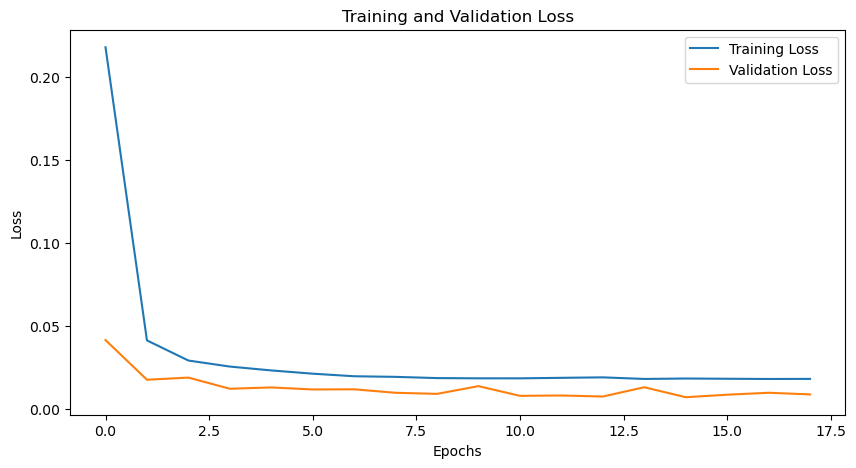

In [13]:
# Plotting Loss and Val_loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()